In [1]:
import pandas as pd
import numpy as np
from pylab import mpl, plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [18]:
from os import listdir
from os.path import isfile, join

path = "../data generators/generated_price_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [4]:
files_imp = ['btc-usd_daily.csv','eth-usd_daily.csv']

## Momentum with Trend Estimation

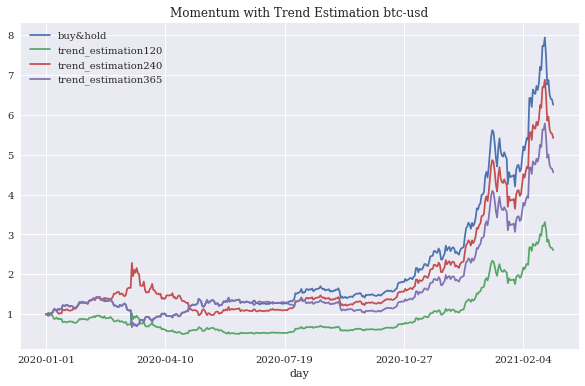

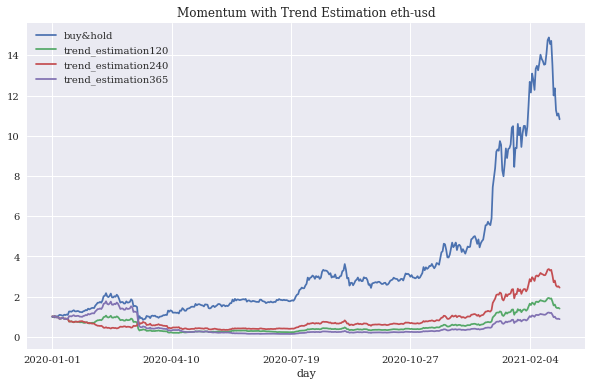

In [21]:
for file in files_imp:
    #read file
    data = pd.read_csv("../data generators/generated_price_data/"+file)
    data = data[['market','day','close']]
    data.index = data['day']

    #take proportion of the data
    test_data = data[(data['day'] >= '2019-12-31')]
    #find buy&hold strategy returns
    test_data['returns'] = (test_data['close'] / test_data['close'].shift(1))-1
    test_data.dropna(inplace=True)
    test_data['buy&hold'] = (1+test_data['returns'].values).cumprod()
    returns_data = test_data[['returns','buy&hold']].copy()

    trend_lengths = [120,240,365]
    for trend_length in trend_lengths:
        test_data = data[(data['day'] >= '2018-01-01')]

        #find trend estimations
        test_data['trend_estimation'] = (test_data['close'] / test_data['close'].shift(trend_length))-1
        
        #determine position
        col_name = 'trend_estimation'+str(trend_length)
        test_data[col_name+'_position'] = np.where(test_data['trend_estimation'] > 0, 1, -1)

        #find returns
        test_data['returns'] = (test_data['close'] / test_data['close'].shift(1))-1
        test_data[col_name+'_returns'] = test_data[col_name+'_position'].shift(1) * test_data['returns']
        test_data.dropna(inplace=True)

        #find cumulative returns
        test_data = test_data[test_data['day'] >= '2020-01-01']
        returns_data[col_name+'_returns'] = test_data[col_name+'_returns'].values
        returns_data[col_name] = (1+returns_data[col_name+'_returns'].values).cumprod()

    plot_columns = ['buy&hold']+['trend_estimation'+str(tl) for tl in trend_lengths]

    plot_title = "Momentum with Trend Estimation "+file[:7]
    ax = returns_data[plot_columns].plot(title=plot_title,figsize=(10, 6))
    ax.get_legend()

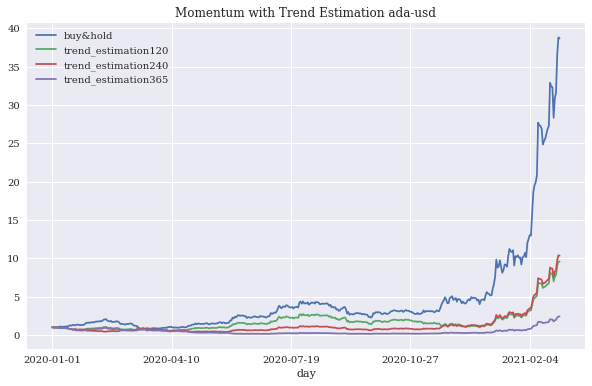

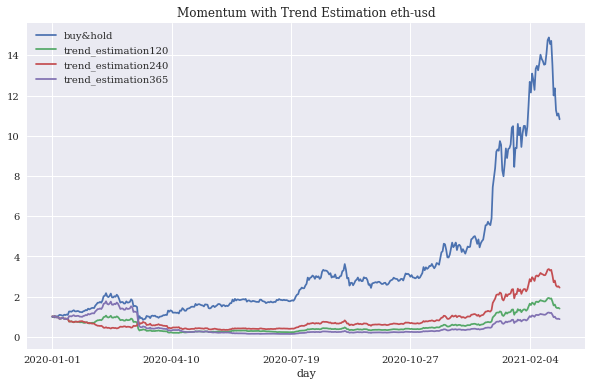

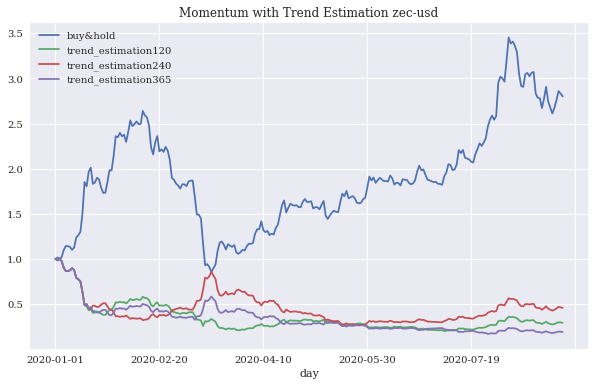

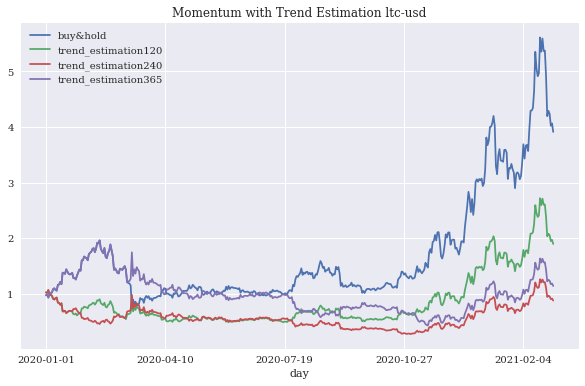

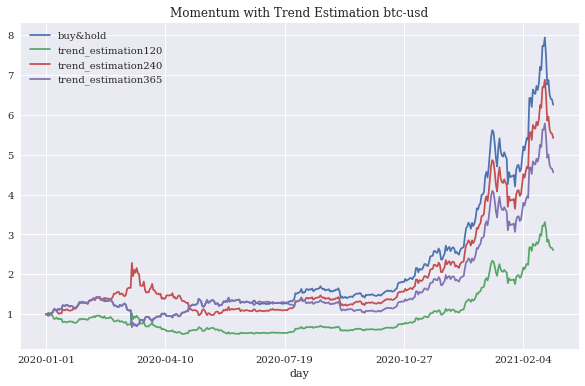

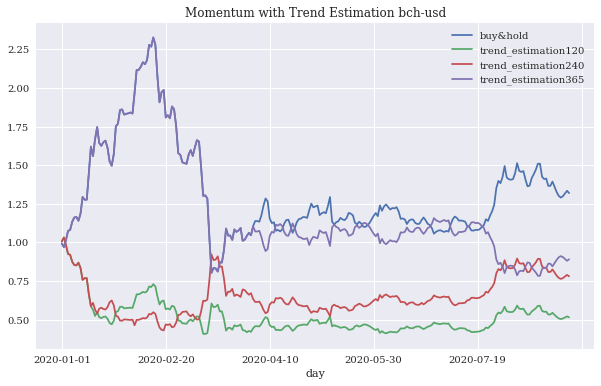

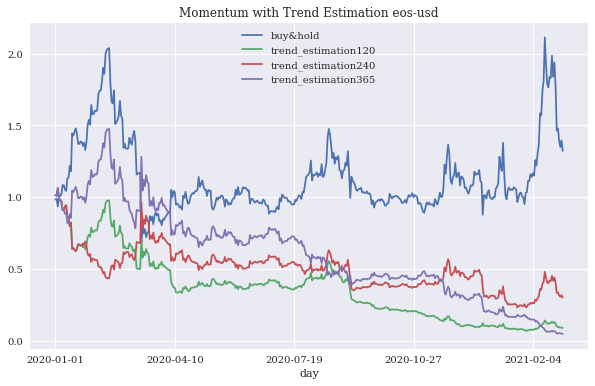

In [22]:
for file in files:
    try:
        #read file
        data = pd.read_csv("../data generators/generated_price_data/"+file)
        data = data[['market','day','close']]
        data.index = data['day']

        #take proportion of the data
        test_data = data[(data['day'] >= '2019-12-31')]
        #find buy&hold strategy returns
        test_data['returns'] = (test_data['close'] / test_data['close'].shift(1))-1
        test_data.dropna(inplace=True)
        test_data['buy&hold'] = (1+test_data['returns'].values).cumprod()
        returns_data = test_data[['returns','buy&hold']].copy()

        trend_lengths = [120,240,365]
        for trend_length in trend_lengths:
            test_data = data[(data['day'] >= '2018-12-31')]


            #find trend estimations
            test_data['trend_estimation'] = (test_data['close'] / test_data['close'].shift(trend_length))-1

            #determine position
            col_name = 'trend_estimation'+str(trend_length)
            test_data[col_name+'_position'] = np.where(test_data['trend_estimation'] > 0, 1, -1)

            #find returns
            test_data['returns'] = (test_data['close'] / test_data['close'].shift(1))-1
            test_data[col_name+'_returns'] = test_data[col_name+'_position'].shift(1) * test_data['returns']
            test_data.dropna(inplace=True)

            #find cumulative returns
            test_data = test_data[test_data['day'] >= '2020-01-01']
            returns_data[col_name+'_returns'] = test_data[col_name+'_returns'].values
            returns_data[col_name] = (1+returns_data[col_name+'_returns'].values).cumprod()

        plot_columns = ['buy&hold']+['trend_estimation'+str(tl) for tl in trend_lengths]

        plot_title = "Momentum with Trend Estimation "+file[:7]
        ax = returns_data[plot_columns].plot(title=plot_title,figsize=(10, 6))
        ax.get_legend()
    except:
        pass

In [30]:
#ax = test_data[['close','sma1','sma2','position']].plot(secondary_y='position',figsize=(10, 6))
#ax.get_legend()